# PROBLEM 2
## Problem 2A

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('lena.png')
img_copy = img.copy()

Text(0.5, 1.0, 'Gray Scaled Lena Image')

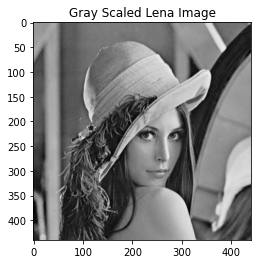

In [3]:
#Converting the Image into GrayScale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,'gray')
plt.title('Gray Scaled Lena Image')

In [4]:
img_gray

array([[162, 162, 161, ..., 172, 160, 131],
       [162, 162, 161, ..., 172, 160, 131],
       [162, 162, 161, ..., 171, 158, 130],
       ...,
       [ 43,  45,  49, ..., 104, 101,  97],
       [ 43,  47,  52, ..., 102, 104, 105],
       [ 44,  47,  54, ..., 101, 105, 108]], dtype=uint8)

In [5]:
#Function to downscale the Image in range [0,1]
def downscale(f: np.array, min_input: int, max_input: int, min_output: int, max_output: int):
    """
    Input: 
        f -> Input Image
        min_input -> Minimum input value 
        max_input -> Maximum Input Value
        min_output -> Minimum output value 
        max_output -> Maximum output Value
    Returns:
        Scaled Down Image -> np.array
        
    """
    # Similar implementation as Homework 
    downscaled_image = (max_output - min_output) * (f / (max_input - min_input))
    return downscaled_image

In [6]:
downscaled_img = downscale(img_gray,0,255,0,1)
downscaled_img

array([[0.63529412, 0.63529412, 0.63137255, ..., 0.6745098 , 0.62745098,
        0.51372549],
       [0.63529412, 0.63529412, 0.63137255, ..., 0.6745098 , 0.62745098,
        0.51372549],
       [0.63529412, 0.63529412, 0.63137255, ..., 0.67058824, 0.61960784,
        0.50980392],
       ...,
       [0.16862745, 0.17647059, 0.19215686, ..., 0.40784314, 0.39607843,
        0.38039216],
       [0.16862745, 0.18431373, 0.20392157, ..., 0.4       , 0.40784314,
        0.41176471],
       [0.17254902, 0.18431373, 0.21176471, ..., 0.39607843, 0.41176471,
        0.42352941]])

## FUNCTION TO IMPLEMENT DFT 

In [7]:
def DFT2(f: np.array) -> np.array:
    """
    Input:
        f - Input Downscaled Gray Image -> np.array
    Returns:
        DFT of Image -> np.array
    """
    #initializing the result with complex np matrix
    dfft = np.zeros(f.shape,dtype = complex)  
    #Applying 1DFFT to each row of the image
    for i in range(f.shape[0]):
        dfft[i] = np.fft.fft(f[i])   
    #Getting the transpose of the output fft rows matrix   
    dfft = np.transpose(dfft)    
    #Applying 1DFFT to the rows of the Transposed matrix i.e columns of original matrix                                      
    for j in range(f.shape[1]):
        dfft[j] = np.fft.fft(dfft[j])  
    #Transposing back to get the original matrix                                             
    dfft = np.transpose(dfft)  
    
    return dfft

In [8]:
dft_image = DFT2(downscaled_img)
dft_image

array([[ 9.41791569e+04   +0.j        , -1.32605209e+03+6928.25982131j,
         4.45443656e+03-3279.8744371j , ...,
        -6.91412640e+02-1838.48708722j,  4.45443656e+03+3279.8744371j ,
        -1.32605209e+03-6928.25982131j],
       [-8.37846358e+01-3545.76432875j, -4.60583826e+03+4606.16030726j,
        -3.20398724e+03 +217.75367606j, ...,
         1.89208255e+03+2351.68297678j, -1.02786238e+03+1296.80098955j,
         1.02025196e+02+2741.432367j  ],
       [-1.30229196e+03 -475.37875408j, -7.95709426e+02 -387.1093878j ,
         1.93767503e+03-1311.96674252j, ...,
         1.02391884e+03+2684.36743816j, -2.09555155e+03 -509.04882679j,
         2.37833148e+03 -182.71616886j],
       ...,
       [ 1.49437911e+03 -627.39365192j,  2.13376241e+03+2046.81793011j,
        -1.52536297e+03 -580.14634242j, ...,
         2.87895939e+03 +316.70305662j,  3.76828529e+02-1965.96854393j,
        -1.56015112e+02+1749.10229252j],
       [-1.30229196e+03 +475.37875408j,  2.37833148e+03 +182.7161688

## SPECTRUM AND PHASE ANGLE

(<matplotlib.image.AxesImage at 0x15ae225f8e0>, Text(0.5, 1.0, 'Phase Angle'))

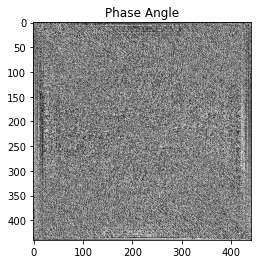

In [9]:
#To obtain the Phase angle of the image

# Phase Angle 
pa = np.angle(dft_image)
pa
plt.imshow(pa,'gray'),plt.title('Phase Angle')

(<matplotlib.image.AxesImage at 0x15ae244fdf0>,
 Text(0.5, 1.0, 'Centered Phase Angle'))

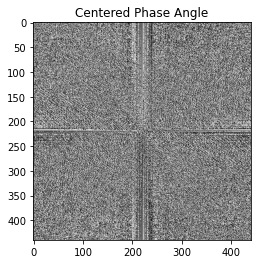

In [10]:
# Shifted Phase Angle
pa_shifted = np.fft.fftshift(pa)
plt.imshow(pa_shifted,'gray'),plt.title('Centered Phase Angle')

(<matplotlib.image.AxesImage at 0x15ae27cef70>,
 Text(0.5, 1.0, 'Spectrum of Transformed Image'))

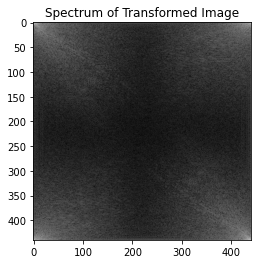

In [11]:
# Spectrum
#Transforming the Image with DFT
f = np.log(1+abs(dft_image))
plt.imshow(f,'gray'),plt.title('Spectrum of Transformed Image')

(<matplotlib.image.AxesImage at 0x15ae2b46130>,
 Text(0.5, 1.0, 'Centered Spectrum Shifted Transformed Image'))

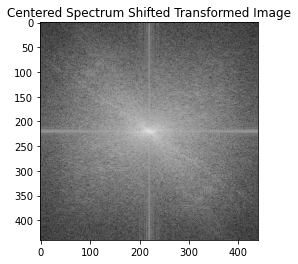

In [12]:
centered_spectrum = np.fft.fftshift(f)
centered_spectrum = np.log(1+abs(centered_spectrum))
plt.imshow(centered_spectrum,'gray'),plt.title('Centered Spectrum Shifted Transformed Image')

##### In the first images of spectrum and phase angle above, we can see the white spots at the corner of the image, they are low frequency components. We will take the low frequency components to the centre from corners so that the centre part will be lower frequency and others will be higher frequency components. For that, we will use  "np.fft.fftshift(input_image). HENCE, shifting is done"

Text(0.5, 1.0, 'Gray Scaled Wolves Image')

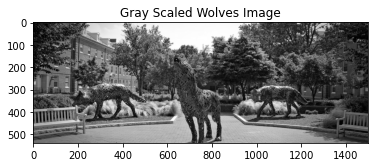

In [13]:
# Wolves Image
wolves = cv2.imread('wolves.png')
wolves_gray = cv2.cvtColor(wolves, cv2.COLOR_BGR2GRAY)
plt.imshow(wolves_gray,'gray')
plt.title('Gray Scaled Wolves Image')

In [14]:
downscaled_wolves = downscale(wolves_gray,0,255,0,1)
downscaled_wolves

array([[0.01960784, 0.00392157, 0.03137255, ..., 0.07843137, 0.0745098 ,
        0.05490196],
       [0.00392157, 0.03921569, 0.01568627, ..., 0.07843137, 0.04705882,
        0.03137255],
       [0.01176471, 0.01960784, 0.01960784, ..., 0.01568627, 0.00784314,
        0.01960784],
       ...,
       [0.44705882, 0.44705882, 0.44705882, ..., 0.13333333, 0.1372549 ,
        0.14117647],
       [0.41176471, 0.41176471, 0.41176471, ..., 0.16470588, 0.17254902,
        0.17647059],
       [0.4       , 0.39607843, 0.39607843, ..., 0.14509804, 0.15294118,
        0.15686275]])

In [15]:
dft_wolves = DFT2(downscaled_wolves)
dft_wolves

array([[309749.69411765    +0.j        , -43779.52839391-33084.28644852j,
        -14588.54690431 -2617.35851031j, ...,
         -9596.71775755 +4111.57656599j, -14588.54690431 +2617.35851031j,
        -43779.52839391+33084.28644852j],
       [ 60326.78347039 +8892.10496815j, -34297.26423775 +5098.73972996j,
          2150.60226237 -6131.17970098j, ...,
        -12472.41023507+11976.53044243j,  -2621.14348949 -8360.04910609j,
        -25652.92495484 +8288.91090502j],
       [ 13252.9833408   +835.68788497j, -10709.34052319+12325.54974752j,
         -1940.52669912-10258.88679056j, ...,
         -3475.18055363 +1242.605219j  ,  -5917.53675298 -7589.77996631j,
          2558.83272453+17235.68910706j],
       ...,
       [  2586.05154279   +60.05017844j,   6939.14797489 -3688.72255071j,
         -8783.21091252 +7432.63540663j, ...,
          7579.1367225  -4271.37954036j,  -2642.90862199 +2428.84450562j,
         -8995.27295488 -6607.14483309j],
       [ 13252.9833408   -835.68788497j,   2

(<matplotlib.image.AxesImage at 0x15ae2bed910>,
 Text(0.5, 1.0, 'Phase Angle (wolves)'))

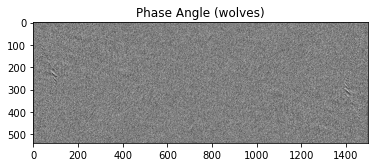

In [16]:
paw = np.angle(dft_wolves)
paw
plt.imshow(paw,'gray'),plt.title('Phase Angle (wolves)')

(<matplotlib.image.AxesImage at 0x15ae2c43ac0>,
 Text(0.5, 1.0, 'Centered Phase Angle (wolves)'))

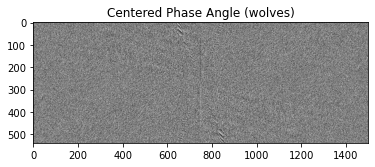

In [17]:
# Shifted Phase Angle
paw_shifted = np.fft.fftshift(paw)
plt.imshow(paw_shifted,'gray'),plt.title('Centered Phase Angle (wolves)')

(<matplotlib.image.AxesImage at 0x15ae2c9cd00>,
 Text(0.5, 1.0, 'Spectrum of Transformed Image (wolves)'))

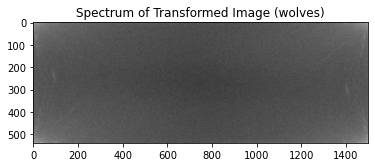

In [18]:
# Spectrum
#Transforming the Image with DFT
fw = np.log(1+abs(dft_wolves))
plt.imshow(fw,'gray'),plt.title('Spectrum of Transformed Image (wolves)')

(<matplotlib.image.AxesImage at 0x15ae310d070>,
 Text(0.5, 1.0, 'Centered Spectrum Shifted Transformed Image (wolves)'))

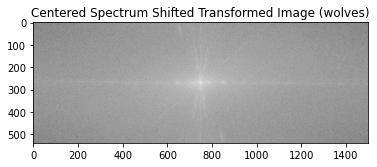

In [19]:
centered_spectrum_w = np.fft.fftshift(fw)
centered_spectrum_w = np.log(1+abs(centered_spectrum_w))
plt.imshow(centered_spectrum_w,'gray'),plt.title('Centered Spectrum Shifted Transformed Image (wolves)')

# Problem 2B

### IDFT Function

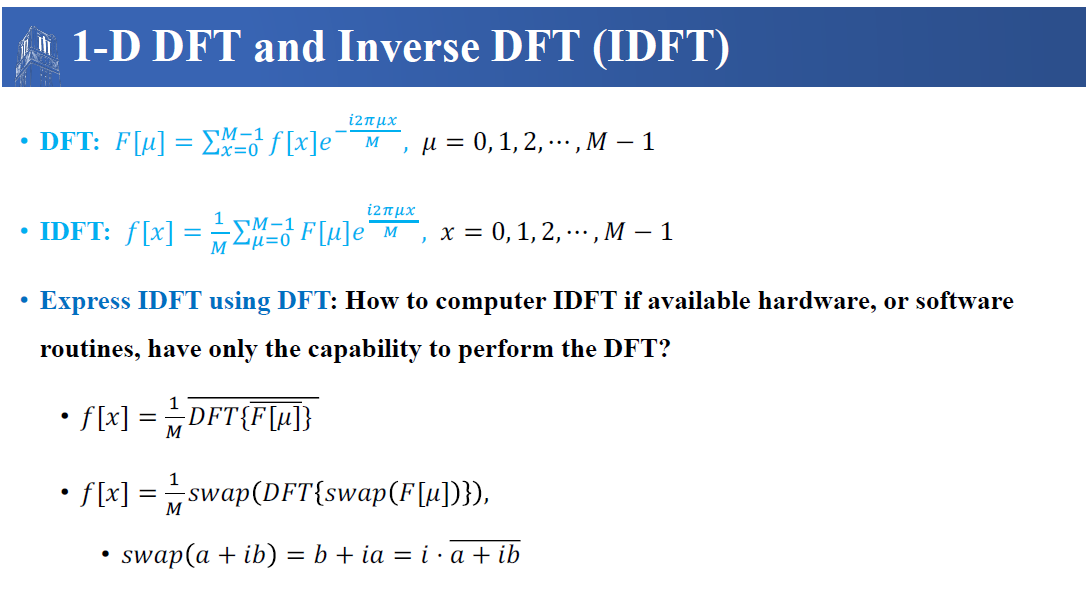

## FUNCTION TO IMPLEMENT IDFT

In [20]:
#According to the snippet above, implementing the same function
def IDFT2(f: np.array):
    """
    Inputs:
        f - input_dft_image -> np.array
    Returns:
        IDFT Image -> np.array
    """
    # Using the formula given in the lecture slides
    f_conjugate = np.imag(f) + complex('j') * np.real(f)
    idft_conjugate = DFT2(f_conjugate)
    idft = np.imag(idft_conjugate) + complex('j') * np.real(idft_conjugate)
    idft = idft/(f.shape[0] * f.shape[1])                             
    return np.real(idft)

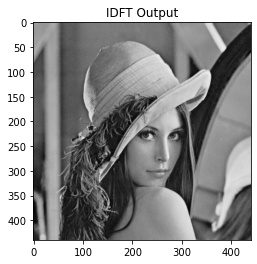

In [21]:
g = IDFT2(dft_image)
plt.imshow(g,cmap = 'gray')
plt.title("IDFT Output")
plt.show()
# We can see that when we use IDFT function on our DFT image, we will get back our downscaled image

## VERIFICATION OF IDFT

In [22]:
# Testing the difference
f = downscaled_img
d = ((f - g).astype(np.uint8))
d

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

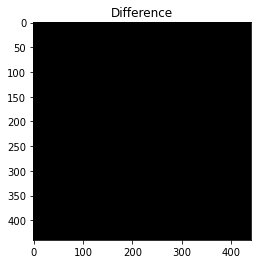

In [23]:
plt.imshow(d,cmap = 'gray')
plt.title("Difference")
plt.show()

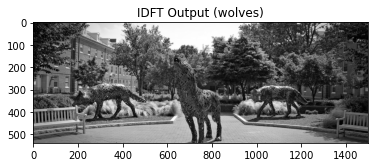

In [24]:
gw = IDFT2(dft_wolves)
plt.imshow(gw,cmap = 'gray')
plt.title("IDFT Output (wolves)")
plt.show()

In [25]:
fw = downscaled_wolves
dw = ((fw - gw).astype(np.uint8))
dw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

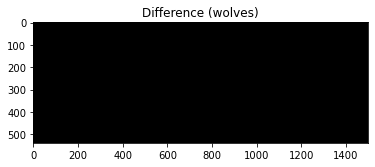

In [27]:
plt.imshow(dw,cmap = 'gray')
plt.title("Difference (wolves)")
plt.show()